<a href="https://colab.research.google.com/github/StanleyNyadzayo/eee408labs/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a basic decision tree learning algorithm from Tom Mitchell's book Machine Learning.

Decision Tree (ID3):
{'Temperature': {'Hot': {'Outlook': {'Sunny': 'No', 'Overcast': 'Yes'}}, 'Mild': {'Outlook': {'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes'}}, 'Cool': {'Wind': {'Weak': 'Yes', 'Strong': {'Outlook': {'Rain': 'No', 'Overcast': 'Yes'}}}}}}


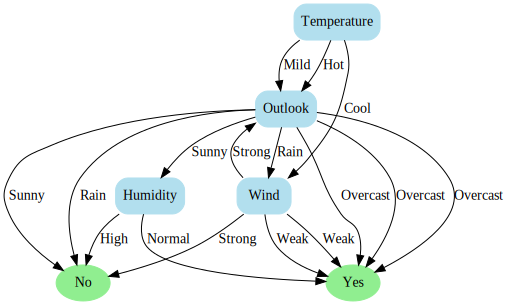

In [ ]:
import math
import pandas as pd
from collections import Counter

# --- Utility Functions ---

def entropy(examples, target_attribute):
    """
    Calculate entropy of the dataset with respect to the target attribute.
    """
    values = examples[target_attribute]
    counts = Counter(values)
    total = len(values)

    ent = 0.0
    for count in counts.values():
        p = count / total
        ent -= p * math.log2(p) # Shannon entropy
    return ent

def information_gain(examples, attribute, target_attribute):
    """
    Calculate the Information Gain of splitting on 'attribute'.
    """

    total_entropy = entropy(examples, target_attribute)
    values = examples[attribute].unique()
    weighted_entropy = 0.0

    for v in values:
        subset = examples[examples[attribute] == v]
        weighted_entropy += (len(subset) / len(examples)) * entropy(subset, target_attribute)

        return total_entropy - weighted_entropy

def most_common_value(examples, target_attribute):
    """
    Return the most common target value in the dataset.
    """
    return examples[target_attribute].mode()[0]

# --- ID 3 Algorithm ---

def id3(examples, target_attribute, attributes):
    """
    Recursively build a decisons tree using the ID3 algorithm.
    Returns a nested dictionary representing the tree
    """

    # If all examples have the same class --> return that class
    if len(examples[target_attribute].unique()) == 1:
        return examples[target_attribute].iloc[0]

    # If no attributes left --> return the most common class
    if len(attributes) == 0:
        return most_common_value(examples, target_attribute)

    # Choose attributes left --> return the most common class
    if len(attributes) == 0:
        return most_common_value(examples, target_attribute)

    # Choose attribute with the highest information gain
    gains = { attr: information_gain(examples, attr, target_attribute) for attr in attributes}
    best_attr = max(gains, key=gains.get)


    tree = {best_attr:{}}

    # For each value of the chosen attribute, grow a branch
    for value in examples[best_attr].unique():
        subset = examples[examples[best_attr] == value]

        if subset.empty:
            tree[best_attr][value] = most_common_value(examples, target_attribute)
        else:
            remaining_attrs = [a for a in attributes if a != best_attr]
            tree[best_attr][value] = id3(subset, target_attribute, remaining_attrs)

    return tree

# --- Example Run (Play Tennis dataset ---
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']
target = 'PlayTennis'

decision_tree = id3(df, target, attributes)
print("Decision Tree (ID3):")
print(decision_tree)



#  Adding visualisation
!pip install graphviz

from graphviz import Digraph

def visualize_tree(tree, parent=None, edge_label=None, graph=None):
    """
    Recursively visualise the decisons tree using graphviz.
    """
    if graph is None:
        graph = Digraph(format='png')
        graph.attr('node', shape='box', style='rounded, filled', color='lightblue2')

    # if the tree is just a leaf (string/class label)
    if isinstance(tree, str):
        node_id = str(id(tree))
        graph.node(node_id, tree, shape='ellipse', color='lightgreen')
        if parent:
            graph.edge(parent, node_id, label=edge_label)
        return graph

    # Otherwise, it is a decision node
    attribute = list(tree.keys())[0]
    node_id = str(id(attribute))
    graph.node(node_id, attribute, shape='box', color='lightblue2')

    if parent:
        graph.edge(parent, node_id, label=edge_label)

    for value, subtree in tree[attribute].items():
        visualize_tree(subtree, parent=node_id, edge_label=str(value), graph=graph)

    return graph

graph = visualize_tree(decision_tree)
graph.render("decision_tree", view=True) # saves and opens the tree as a png
graph